<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Forest Fires
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> </b> <br>
    <b>Forest Fire Analysis and Predictions<br>
    Antonio Astorino <br>
    <a href="mailto:antonio.as@hotmail.it">antonio.as@hotmail.it</a><br>
    </div>
    </td>
    </td>
</tr>
</table>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import scipy

np.random.seed(0)

<p><strong>Main Goal</strong></p>The main goal of my analysis is to predict the burned area of forest fires using the data on the dataset. 

<p><strong>Disclaimer</strong></p> I run several tests on this dataset, in order to make the notebook light and readable, I won't show every result I obtained . Everytime I will refer to results on tests that are not shown, I will write them betweeen a ¶. I also used the lab code provided.

In [ ]:
#Import the dataset
fire = pd.read_csv("/Users/hastors/forestfires/data/forestfires1.csv")

## Explore the data

In [3]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    object 
 5   DMC     517 non-null    float64
 6   DC      517 non-null    object 
 7   ISI     517 non-null    object 
 8   temp    517 non-null    object 
 9   RH      517 non-null    int64  
 10  wind    517 non-null    object 
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 52.6+ KB


The dataset consists in 13 columns. First of all I convert the non-numeric variables into numeric variables. Then, later on, I will encode the only two categorical variables ('month' and 'day') 

In [4]:
# 'Missing' strigs treated as nan
fire['FFMC'] = pd.to_numeric(fire['FFMC'], errors='coerce')
fire['DC'] = pd.to_numeric(fire['DC'], errors='coerce')
fire['ISI'] = pd.to_numeric(fire['ISI'], errors='coerce')
fire['temp'] = pd.to_numeric(fire['temp'], errors='coerce')
fire['wind'] = pd.to_numeric(fire['wind'], errors='coerce')

In [5]:
#Checking for the null values
fire.isna().sum()
fire.isna().sum().sum()

X        0
Y        0
month    0
day      0
FFMC     1
DMC      0
DC       1
ISI      2
temp     2
RH       0
wind     1
rain     0
area     0
dtype: int64

7

In [6]:
# We can safetly remove these missing values since they're not so many. In fact they are only 7.
fire.dropna(inplace = True)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel=

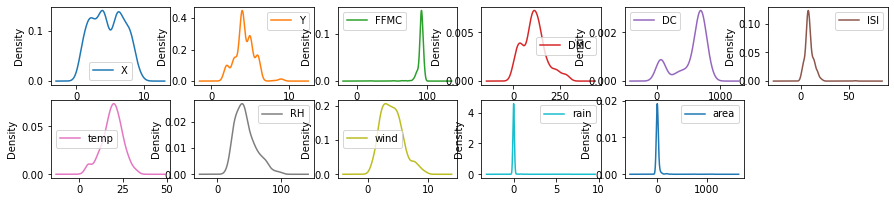

In [7]:
#check the approximate distributions
fire.plot(kind='density', subplots=True, layout=(6,6), figsize=(15,10), sharex=False, sharey=False)

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'FFMC'}>],
       [<AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>],
       [<AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>, <AxesSubplot:>]],
      dtype=object)

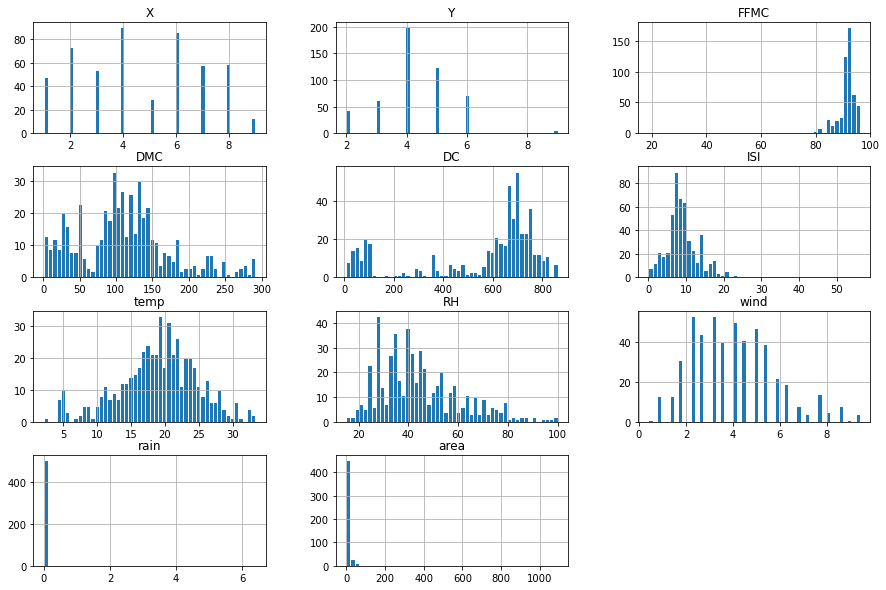

In [8]:
#visualizing distributions 
fire.hist(bins=50, figsize=(15,10), ec='w')
plt.show()

Here we can notice that data have extreme outliers, but i can't remove them because I don't know if they are a result of data entry error and if they affect the assumptions on my models.  

Before transform the categorical values let's just have a look on them

In [10]:
#Let's see how the records are distributed among the time
print('months', fire.month.value_counts(), sep='\n')
print('\n')
print('days', fire.day.value_counts(), sep='\n')

months
aug    180
sep    171
mar     53
jul     32
feb     20
jun     17
oct     14
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64


days
sun    93
fri    84
sat    81
mon    73
tue    64
thu    61
wed    54
Name: day, dtype: int64


<AxesSubplot:>

Text(0.5, 1.0, 'Fires per month')

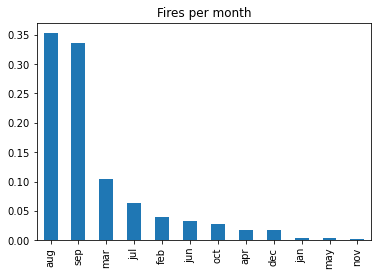

In [11]:
fire.month.value_counts(normalize=True).plot.bar()
plt.title('Fires per month')

<AxesSubplot:>

Text(0.5, 1.0, 'Fires per day')

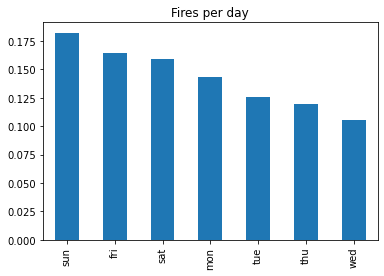

In [12]:
fire.day.value_counts(normalize=True).plot.bar()
plt.title('Fires per day')

We can see that, regarding the days, the records are slighty higher in the weekend than during the week 
(wed is the less recorded day). That's may suggest that the non working days (tourism/camping phenomena) 
could be a risk factor. 
About the months. 
As we can imagine, the most recorded are the dry months in the end of the summer (August and September). 
This confirms that weather factors are crucial, but we have to not forget that those are also the most
taken vacations months. 

We can also notice that there are months with just 1-2 records (nov, may, jan) that, despite the weather condition, we can maybe delete or ignore for our computations since, among the others, they have a very small impact.

¶Removing these 3 months has no impact on the analysis¶




Since the area is our response variable, I want to look at it.

0.00      240
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64


(array([501.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Area Distribution')

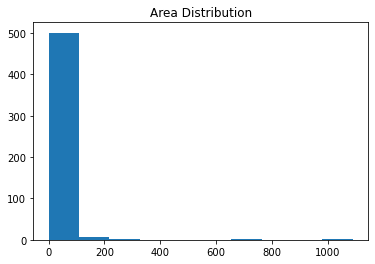

In [13]:
#As we can see here the smallest fires (the ones with 0 value) are the most recorded, and 
#its distribution is centered in 0.

#We can count them
count = fire['area'].value_counts()
print(count)
#And plot
plt.hist(fire.area)
plt.title('Area Distribution')

All these zeros may be a problem for the model. To have a better distribution, I normalize with a logarithm.

¶ This will have a positive effect on the feature selection, and also in the linear regression. In particular, in linear regression, the raw data (with same CI) reject the variable 'DC' (which is reasonable). The log one, instead, reject the 'wind' with better values (best model I've obtained)¶



In [14]:
#I use the logarithm function y = ln(x + 1)
fire['area'] = np.log1p(fire['area'])

In [15]:
#Correlation matrix
corr_matrix = fire.corr(method='spearman')
corr_matrix

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.493283,-0.063374,-0.081422,-0.074421,-0.011041,-0.054645,0.068922,0.022796,0.111390,0.068903
Y,0.493283,1.000000,-0.017597,-0.000272,-0.106566,-0.019990,-0.043343,0.046805,-0.012029,0.079715,0.047177
FFMC,-0.063374,-0.017597,1.000000,0.509218,0.257692,0.783789,0.594127,-0.324048,-0.028458,0.097921,0.024682
DMC,-0.081422,-0.000272,0.509218,1.000000,0.558270,0.424849,0.503870,0.029342,-0.109054,0.121556,0.074060
DC,-0.074421,-0.106566,0.257692,0.558270,1.000000,0.100761,0.307481,0.025962,-0.199402,0.008105,0.060382
ISI,-0.011041,-0.019990,0.783789,0.424849,0.100761,1.000000,0.411386,-0.174655,0.143856,0.118499,0.012638
temp,-0.054645,-0.043343,0.594127,0.503870,0.307481,0.411386,1.000000,-0.518425,-0.174771,0.026136,0.080073
RH,0.068922,0.046805,-0.324048,0.029342,0.025962,-0.174655,-0.518425,1.000000,0.033943,0.181923,-0.027904
wind,0.022796,-0.012029,-0.028458,-0.109054,-0.199402,0.143856,-0.174771,0.033943,1.000000,0.122531,0.061402
rain,0.111390,0.079715,0.097921,0.121556,0.008105,0.118499,0.026136,0.181923,0.122531,1.000000,-0.066020


[ 0.06903548  0.04035975  0.04835065  0.06860338  0.06701331 -0.00962443
  0.05519643 -0.05721455  0.07158136  0.02261075  1.        ]


<AxesSubplot:>

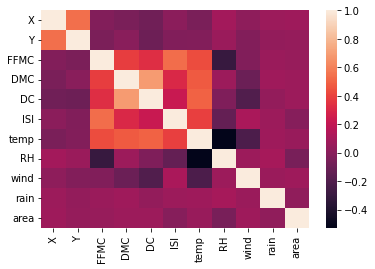

In [16]:
#Correlation map
#There are no (high) significative correlations between the data.
print(fire.corr().to_numpy()[:,-1])
sns.heatmap(fire.corr())

In [17]:
# In order to use the categorical values, I use the one-hot encoding for 'month' and 'day'
# or similar fire = pd.get_dummies(fire, columns=['month','day'],drop_first=True)

def onehot_feature(fire, column_name):
    # Retrieve the unique values (the categories) and an index for each sample
    # specifying the sample category (values[value_idx] reconstruct the original array)
    col_values = fire[column_name].to_numpy().astype('<U')
    values, value_idx = np.unique(col_values, return_inverse=True)
    n_values = values.size
    # Create a temporary identity matrix to convert value_idx into one-hot features
    onehots = np.eye(n_values, n_values)
    value_onehot = onehots[value_idx]
    # Remove the categorical feature
    fire = fire.drop(column_name, axis=1)
    # Add the new featues
    for i in range(n_values):
        fire["{}_{}".format(column_name, values[i])] = value_onehot[:, i]
        
    return fire

# Convert month and day into a one-hot encoding
fire_temp = onehot_feature(fire, 'month')
fire_temp1 = onehot_feature(fire_temp, 'day')
fire_temp1

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Analysis

### Split data

Split the data into train and test data.

In [18]:
# Split X and y
# X all the columns except 'area'
X_all_features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
                  'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun',
       'day_thu', 'day_tue', 'day_wed']
# Select the features and convert them to numpy
X = fire_temp1[X_all_features].to_numpy()
# y just the 'area' column
y = fire_temp1['area'].to_numpy()

print("X.shape", X.shape, "X.dtype", X.dtype)
print("y.shape", y.shape, "y.dtype", y.dtype)

X.shape (510, 29) X.dtype float64
y.shape (510,) y.dtype float64


In [19]:
from sklearn.model_selection import train_test_split,GridSearchCV

split_test_seed = 40
split_test_size = 0.3


# Split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=split_test_size, 
                                                    random_state=split_test_seed)

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)

X_train.shape (357, 29)
X_test.shape (153, 29)


## Linear regression

In [20]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression  # model selection

# Build model + Model fitting
model = LinearRegression(fit_intercept=True)
model = model.fit(X_train, y_train) #model fitting

# Prediction
y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

# Model evaluation
print("Train R2 score ", r2_score(y_train, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train, y_predict_train))

print("Test R2 score ", r2_score(y_test, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test, y_predict_test))

Train R2 score  0.11998050208180677
Train MSE score  1.6950765354676494
Test R2 score  -0.14527137520693478
Test MSE score  2.337716310722721


In [21]:
for idx, col_name in enumerate(X_all_features):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))
print("The intercept is {:0.3f}".format(model.intercept_))

The coefficient for X is 0.05358795362291087
The coefficient for Y is 0.026534480094867915
The coefficient for FFMC is 0.014694762248391603
The coefficient for DMC is 0.0024532540149069778
The coefficient for DC is -0.0022235329716174153
The coefficient for ISI is -0.01069798419683853
The coefficient for temp is 0.042183800521264296
The coefficient for RH is 0.007226518827419254
The coefficient for wind is 0.09589268937134163
The coefficient for rain is 0.0741684903592903
The coefficient for month_apr is 0.011299011535152432
The coefficient for month_aug is -0.08772591988135797
The coefficient for month_dec is 1.519315802644301
The coefficient for month_feb is -0.1671371829085219
The coefficient for month_jan is -0.8734994073279021
The coefficient for month_jul is -0.6704107478644032
The coefficient for month_jun is -0.7539480067695682
The coefficient for month_mar is -0.8588771147542963
The coefficient for month_may is 2.1794209407062026
The coefficient for month_nov is -1.30839139695

In [22]:
from scipy.stats import t, f

def rss(y_true, y_pred):
    # First we make sure the shapes are the same
    y_true = y_true.reshape(y_pred.shape)
    return np.sum((y_true - y_pred) ** 2)

def tss(y):
    return np.sum((y - y.mean()) ** 2)

def multiple_least_squares(X, y):
    # Helper function that uses scikit-learn models
    # and behaves as the function we implemented in
    # Lab02.01
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)
    y_pred = model.predict(X)
    betas = [model.intercept_, *model.coef_]
    return betas, y_pred

# Computes coefficient statistcs
def show_stats(X, y, betas, names, alpha=None):
    n_samples, n_features = X.shape
    deg = n_samples-n_features
    
    # If the ones column has not been added
    if X.shape[1] + 1 == betas.shape[0]:
        X = np.concatenate([np.ones([X.shape[0], 1]), X], axis=-1)
    
    # Compute the prediction
    pred = X.dot(betas).reshape(-1)
    betas = betas.reshape(-1)
    y = y.reshape(-1)
    RSE = ((y-pred)**2).sum()/(n_samples - n_features)

    # Compute the t statistics
    se2_b = RSE*(np.linalg.inv(np.dot(X.T, X)).diagonal())
    se_b = np.sqrt(se2_b)
    t_stat_b = (betas - 0) / se_b

    # Compute the p-value
    p_values = np.array([2*t.sf(np.abs(t_stat), deg) for t_stat in t_stat_b])
    
    df = pd.DataFrame()
    df["Name"] = names
    df["Coefficients"] = betas
    df["Standard Errors"] = se_b
    df["t-stat"] = t_stat_b
    df["p-value"] = p_values
    if alpha:
        rejectH0 = p_values < alpha
        df["reject H0"] = rejectH0    
    
    RSS = np.sum((y - pred)**2)
    MSE = RSS/y.shape[0]
    #print("RSS: {}".format(RSS))
    
    return df
 
# H0: all features in the subset are equal to 0    
def Ftest_restricted(data, y, subset_features):
    # Train the complete model
    X_complete = data.to_numpy()
    y = y.to_numpy()
    n = X_complete.shape[0]
    
    betas_complete, y_pred = multiple_least_squares(X_complete, y)    
    rss_complete = rss(y, y_pred)
    nf_complete = X_complete.shape[1]
    
    # Train the restricted model
    notS = data.columns.difference(subset_features)
    X_restr = data[notS].to_numpy()
    betas_restr, y_pred = multiple_least_squares(X_restr, y)

    rss_restr = rss(y, y_pred)
    nf_restr = X_restr.shape[1]

    q = nf_complete - nf_restr

    # Compute F statistics
    F_num = (rss_restr - rss_complete) / q
    F_den = rss_complete / (n - nf_complete - 1)
    F = F_num / F_den

    # Compute the p-value
    p_value = f.sf(F, q, n - nf_complete - 1)
    return p_value, F

In [23]:
#I set alpha 0.5
betas = np.array([model.intercept_, *model.coef_]).reshape(-1, 1)
show_stats(X_train, y_train, betas, ['Intercept', *X_all_features], alpha=0.05)

,Name,Coefficients,Standard Errors,t-stat,p-value,reject H0
0,Intercept,-1.166955,5.418045e+06,-2.153830e-07,1.000000,False
1,X,0.053588,3.800413e-02,1.410056e+00,0.159471,False
2,Y,0.026534,7.305557e-02,3.632095e-01,0.716682,False
3,FFMC,0.014695,1.709185e-02,8.597528e-01,0.390553,False
4,DMC,0.002453,2.310629e-03,1.061726e+00,0.289141,False
5,DC,-0.002224,1.670675e-03,-1.330919e+00,0.184140,False
6,ISI,-0.010698,1.978069e-02,-5.408297e-01,0.588992,False
7,temp,0.042184,2.718882e-02,1.551513e+00,0.121743,False
8,RH,0.007227,7.655468e-03,9.439683e-01,0.345881,False
9,wind,0.095893,4.444541e-02,2.157538e+00,0.031689,True


**Comment**

For the all feature (except 'wind') the t-test failed and so we have no evidence to say that those features are correlated with the observatation. 'wind' passing the f-test could have sense since (for propagating) the forest fires has a huge impact.
The R2 scores are bad (but not so bad) that means our model does not fit the real data.

¶Setting the CI with alpha=0.5 it makes'wind' to reject the Null hypothesis. Without the normalization on the area, it would be 'DC' with a similar p-value (0.026437) but a negative t-stat (-2.229801e+00).
'DC' also can make sense because is a measure of the Drought Code, and index that represents drying deep into the soil.
¶

In [113]:
#Perform F-stat
alpha = 0.05
X_all_features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue', 'day_wed']
# The Ftest_restricted function expect an input data that is a Pandas
# array (since it will use strings to select the restricted model's features)
# However X_train is a numpy array. Let's convert it back to Pandas
X_train_pd = pd.DataFrame(X_train, columns=X_all_features)
y_train_pd = pd.DataFrame(y_train)
#all features without 'wind'

features = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'rain', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue', 'day_wed']
p_value, F = Ftest_restricted(X_train_pd, y_train_pd, features)
print("p-value =", p_value)
print("F-stat =", F)
if p_value < alpha:
    print("Reject H0: There evidence to say that at least one of the S features is useful")
else:
    print("Do not Reject H0: There is NO evidence to say that at least one of the S features is useful")

p-value = 0.06609326130982851
F-stat = 1.4591481385965328
Do not Reject H0: There is NO evidence to say that at least one of the S features is useful


As expected we can't refuse null hypothesis 

In [34]:
#Fit the model with 'wind'
target = 'area'


X_features = ['wind']
X = fire_temp1[X_features].to_numpy()
y = fire_temp1[target].to_numpy()

split_test_seed_v2=3
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X, y,
                                                                test_size=split_test_size, 
                                                                random_state=split_test_seed_v2)

model = LinearRegression(fit_intercept=False) # We already discovered intercept is not significant                       
model = model.fit(X_train_small, y_train_small)       
y_predict_test = model.predict(X_test_small)     
y_predict_train = model.predict(X_train_small)


print("Train R2 score ", r2_score(y_train_small, y_predict_train))
print("Train MSE score ", mean_squared_error(y_train_small, y_predict_train))

print("Test R2 score ", r2_score(y_test_small, y_predict_test))
print("Test MSE score ", mean_squared_error(y_test_small, y_predict_test))

Train R2 score  -0.0675406112475816
Train MSE score  2.1897304174728394
Test R2 score  -0.05455037980456723
Test MSE score  1.8475492176179684


The R2 score is negative so probably the wind feature does not follow the trend of the data (maybe we can have better results with overfitting), the MSE is not too bad. 

¶ Wihout normalize the area, removing the months the results are much worse¶

## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# ¶I choose to use degree=1 because, performing the cross-validation, ti produces the lowest MSE.
poly = PolynomialFeatures(degree=1, include_bias=False)
poly = poly.fit(X_train_small)

# Applies the transformation
X_train_poly = poly.transform(X_train_small)
X_test_poly = poly.transform(X_test_small)

# With degree 2 we have: x1,x2,x3,x1x1,x1x2,x1x3,x2x2,x2x3,x3x3
print("X_train_small.shape", X_train_small.shape, " X_poly_train.shape", X_train_poly.shape)
print("X_train_small.shape", X_test_small.shape, " X_poly_train.shape", X_test_poly.shape)

**Train**

In [ ]:
# Fit the LinearRegression predictor
model = LinearRegression(fit_intercept=True)           
model.fit(X_train_poly, y_train_small)
y_predict = model.predict(X_test_poly)

**Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score ", r2_score(y_test_small, y_predict))
print("MSE score ", mean_squared_error(y_test_small, y_predict))

The R2 is very very low (at least is non negative!). That means, again, that our model that does not explain any of the variation in the response variable around its mean. We cannot say much because we don't know if 'area' is statistically significant.


### Hyperparameters selection

In [ ]:
split_test_seed_v3=41
X_trainR_small, X_val_small, y_trainR, y_val = train_test_split(X_train_small, y_train_small, 
                                                                test_size=y_test.shape[0],
                                                                random_state=split_test_seed_v3)

In [106]:
from sklearn.pipeline import Pipeline
#I've tried increasing the range of the degree from 0 to 30 to see what happen. 
degree = list(range(1,30))
test_scores = np.zeros(len(degree))
val_scores = np.zeros(len(degree))
train_scores = np.zeros(len(degree))

# Validation
for i, d in enumerate(degree):
    
    model = Pipeline([('poly', PolynomialFeatures(degree=d, include_bias=False)),
                      ('linear', LinearRegression(fit_intercept=True))])
    
    model = model.fit(X_trainR_small, y_trainR)
    
    y_predict = model.predict(X_val_small)
    val_score = r2_score(y_val, y_predict)
    y_predict = model.predict(X_test_small)
    test_score = r2_score(y_test_small, y_predict)
    y_predict = model.predict(X_trainR_small)
    train_score = r2_score(y_trainR, y_predict)
    
    val_scores[i] = val_score
    test_scores[i] = test_score
    train_scores[i] = train_score

# Identifies which is the best degree
best_model_idx = np.argmax(val_scores)
best_degree = degree[best_model_idx]
# And the corresponding (best) validation score
best_val_score = val_scores[best_model_idx]
print("Best degree: ", best_degree,
      "\nVal score: ", best_val_score)
    
    
# Train again the Pipeline using the best parameter and the whole training set
model = Pipeline([('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])
# Note: we train on X_train_small + X_val
model = model.fit(X_train_small, y_train_small)
y_predict = model.predict(X_test_small)
test_score = r2_score(y_test_small, y_predict)

print("Test score:", test_score)

Best degree:  21 
Val score:  -0.02099296171559173
Test score: -23.393805127600665


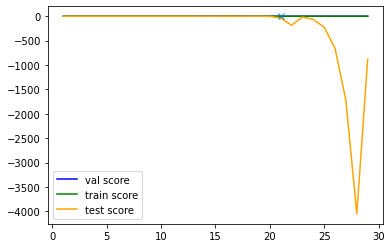

In [108]:
_ = plt.plot(degree,val_scores, label="val score", color="blue")
_ = plt.plot(degree, train_scores, label="train score", color="g")
_ = plt.plot(degree, test_scores, label="test score", color="orange")
_ = plt.plot([best_degree], [best_val_score], marker="x")
plt.legend()

It shows that the best degree is 21, this make me think that maybe there is some correlation between the dependent variables (interactions that need further investigations). 

But our best degree, confirmed by the cross validation and GridSearchCV (that are below), is 1 (it could make sense only 'wind' passed the test before). Anyway, as we can see on the graph, our model is a mess.

## Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score

Best degree:  1 
Val score:  -0.03201952903706142
Test score: 0.009496030812578216


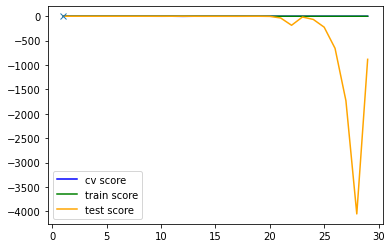

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

r2_scorer = make_scorer(r2_score,
                        greater_is_better=True)

#same degree as before
degree = list(range(1,30))
val_scores = np.zeros(len(degree))
# Validation
for i, d in enumerate(degree):
    model = Pipeline([('poly', PolynomialFeatures(degree=d, include_bias=False)),
                      ('linear', LinearRegression(fit_intercept=True))])
    scores = cross_val_score(model, X_train_small, y_train_small, scoring=r2_scorer, cv=5)
    val_scores[i] = np.mean(scores)

# Identifies which is the best degree
best_model_idx = np.argmax(val_scores)
best_degree = degree[best_model_idx]
# And the corresponding (best) validation score
best_val_score = val_scores[best_model_idx]
print("Best degree: ", best_degree,
      "\nVal score: ", best_val_score)
    
    
# Train again the Pipeline using the best parameter and the whole training set
model = Pipeline([('poly', PolynomialFeatures(degree=best_degree, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])
# Note: we train on X_train_small + X_val
model = model.fit(np.concatenate([X_train_small]), np.concatenate([y_train_small]))
y_predict = model.predict(X_test_small)
test_score = r2_score(y_test_small, y_predict)

print("Test score:", test_score)

_ = plt.plot(degree, val_scores, label="cv score", color="blue")
_ = plt.plot(degree, train_scores, label="train score", color="green")
_ = plt.plot(degree, test_scores, label="test score", color="orange")
_ = plt.plot([best_degree], [best_val_score], marker="x")
plt.legend()

As written before the best degree is 1. And the value and test score are very bad.

If we perform GridSearchCV the results does not change aswell.

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
from sklearn.model_selection import GridSearchCV

# Validation
model = Pipeline([('poly', PolynomialFeatures(degree=1, include_bias=False)),
                  ('linear', LinearRegression(fit_intercept=True))])

# Select parameters to optimize
parameters = {'poly__degree': list(range(1,5))}
              #'linear__fit_intercept': [True, False],
              #'linear__normalize': [True, False]}

cv = GridSearchCV(model, parameters, scoring=r2_scorer, cv=5, refit=True)
cv.fit(X_train_small, y_train_small)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(degree=1,
                                                           include_bias=False)),
                                       ('linear', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3, 4]},
             scoring=make_scorer(r2_score))

In [112]:
model = cv.best_estimator_
y_predict = model.predict(X_test_small)
test_score = r2_score(y_test_small, y_predict)

print("Best degree:", cv.best_params_['poly__degree'])
print("Train score:", cv.best_score_)
print("Test score:", test_score)

Best degree: 1
Train score: -0.03201952903706142
Test score: 0.009496030812578216


## Best Feature Subset Selection

Since we have so many possible features and our model is bad this is not ideal. In order to understand if there are any difference with the forward selection i wanted to perform this selection too.

In [67]:
# Convert back from numpy arrays to data frames
X_train_pd = pd.DataFrame(X_train, columns=X_all_features)
X_test_pd = pd.DataFrame(X_test, columns=X_all_features)


In [68]:
import itertools
def get_subsets(X_pd, dim):
    feature_names = X_pd.columns.tolist()
    # Compute all possibile combinations of 'dim' values
    subset_names = itertools.combinations(feature_names, dim) # list of list of names [[name of first candidate, ...], [...]]
    # Convert names into datasets
    data_subsets = [X_pd[list(fnames)] for fnames in subset_names]
    return data_subsets

subsets = get_subsets(X_train_pd, 1)
subsets[0].head() # training set of the first subset
subsets[1].head() # training set of the second subset

,X
0,2.0
1,2.0
2,1.0
3,7.0
4,3.0


,Y
0,2.0
1,5.0
2,4.0
3,4.0
4,4.0


It takes X and Y. It's another confirm that all the other variables appear meaningless to the model.

In [69]:
def get_evaluator(scorer):
    def evaluator(model, X, y, trained=False):
        if not trained:
            model = model.fit(X, y)
        score = scorer(model, X, y)
        return model, score
    return evaluator    

In [70]:
from sklearn.dummy import DummyRegressor

def subset_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                     candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                     subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                     test_evaluator=None, test_argbest=None, # Metric to be used on the test set
                     candidates_scorer_name=None,  # Name of 2. figure
                     subsets_scorer_name=None,     # Name of 3. figure
                     verbose=True, weight_step3=0):  
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = [] 
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A counter to keep track of the total number of trials
    
    # 1. and 2. Evaluate all Mk candidates with
    #           k=0...P features
    # =========================================
    for dim in range(num_features+1):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Fixed the number of features 'dim', look at
        #     all the possible candidate models with that
        #     cardinality
        # ===============================================
        dim_subsets = get_subsets(Xtrain_pd, dim=dim)
        for Xtrain_sub in dim_subsets:
            
            # Train the model on the subset
            if Xtrain_sub.shape[-1] == 0:
                # 1. Train the M0 model if the number of
                #    features is zero!
                # ======================================
                model = DummyRegressor()
            else:
                model = LinearRegression(fit_intercept=True)
            
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([dim]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate among those using
        #     the same number of features (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        # Save best candidate features
        best_features = dim_subsets[idx_best_candidate].columns.tolist()
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        subsets_best_features.append(best_features)
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = dim_subsets[idx_best_candidate]
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_subset_Xtrain.columns.tolist()]
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        num_evaluations += weight_step3
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how the 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()



............
Best model (M0) with 0 features: []
M0 subset score (3.): 2.04486626778766
............
Best model (M1) with 1 features: ['month_sep']
M1 subset score (3.): 2.1695235837655993
............
Best model (M2) with 2 features: ['month_dec', 'month_sep']
M2 subset score (3.): 2.1135529919072633
............
Best model (M3) with 3 features: ['month_dec', 'month_may', 'month_sep']
M3 subset score (3.): 2.2018589056909565
............
Best model (M4) with 4 features: ['wind', 'month_dec', 'month_may', 'month_sep']
M4 subset score (3.): 2.2529839336197135


KeyboardInterrupt: 

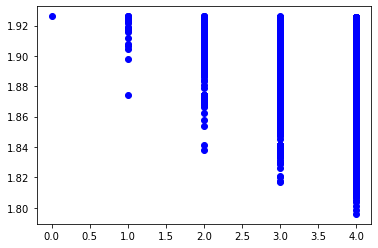

In [71]:
subset_selection(X_train_pd, y_train, X_test_pd, y_test,
                 get_evaluator(make_scorer(mean_squared_error)), np.argmin,
                 get_evaluator(make_scorer(mean_squared_error)), np.argmin,
                 candidates_scorer_name="MSE",
                 subsets_scorer_name="MSE",
                 verbose=True)

#subset_selection(X_train_pd, y_train, X_test_pd, y_test,
#                 #...use RSS evaluator...
#                 #...use RSS evaluator...
#                 candidates_scorer_name="RSS",
#                 subsets_scorer_name="RSS",
#                 verbose=False)

We obntain only months until M4 in which we find 'wind'. 


¶On every attempt the best model with 1 feature is month_sept, maybe because it's the month with higher observation and higher values.¶


#### Sigma score

In [79]:
def estimate_sigma(Xtrain_pd, ytrain):
    # Sigma is usually estimated using the model with all features
    n, p = Xtrain_pd.shape
    model = LinearRegression(fit_intercept=True)
    model.fit(Xtrain_pd, ytrain)
    y_pred = model.predict(Xtrain_pd)
    RSS = rss(y_pred, ytrain)
    RSE = np.sqrt(RSS / (n-p))
    return RSE

def cp(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / n

def aic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + 2*d*sigma2) / (n*sigma2)

def bic(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    return (rss(y_pred, y_true) + np.log(n)*d*sigma2) / (n*sigma2)

def adj_r2(y_pred, y_true, n, d, sigma):
    sigma2 = sigma**2
    RSS = rss(y_pred, y_true)
    TSS = tss(y_true)
    return 1 - (RSS/(n-d-1)) / (TSS/(n-1))

............
Best model (M0) with 0 features: []
M0 subset score (3.): 2.04486626778766
............
Best model (M1) with 1 features: ['month_sep']
M1 subset score (3.): 2.1695235837655993
............
Best model (M2) with 2 features: ['month_dec', 'month_sep']
M2 subset score (3.): 2.1135529919072633
............
Best model (M3) with 3 features: ['month_dec', 'month_may', 'month_sep']
M3 subset score (3.): 2.2018589056909565
............
Best model (M4) with 4 features: ['wind', 'month_dec', 'month_may', 'month_sep']
M4 subset score (3.): 2.2529839336197135


KeyboardInterrupt: 

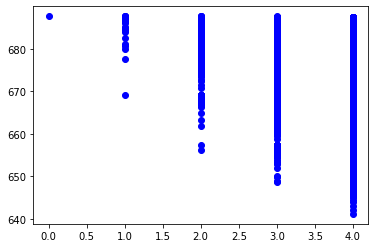

In [81]:
def get_sigma_scorer(metric, sigma):
    def scorer(model, X, y):
        n, d = X.shape
        y_pred = model.predict(X)
        return metric(y_pred, y, n, d, sigma)
    
    return scorer

sigma = estimate_sigma(X_train_pd, y_train)
subset_selection(X_train_pd, y_train, X_test_pd, y_test,
                 get_evaluator(make_scorer(rss)), np.argmin, # 2.
                 get_evaluator(get_sigma_scorer(bic, sigma)), np.argmin, # 3.
                 get_evaluator(make_scorer(mean_squared_error)), np.argmin, # test
                 candidates_scorer_name="RSS",
                 subsets_scorer_name="BIC",
                 verbose=True)

Same results with sigma score.

## Forward Feature Selection

In [ ]:
def forward_selection(Xtrain_pd, ytrain, Xtest_pd, ytest,
                      candidates_evaluator, candidates_argbest, # Metric to be used at 2.b
                      subsets_evaluator, subsets_argbest,       # Metric to be used at 3
                      test_evaluator=None, test_argbest=None,
                      candidates_scorer_name=None,  # Name of 2. figure
                      subsets_scorer_name=None,     # Name of 3. figure
                      verbose=True, weight_step3=0):   
    test_evaluator = subsets_evaluator if not test_evaluator else test_evaluator
    test_argbest = subsets_argbest if not test_argbest else test_argbest
    
    # Global variable init
    # ====================
    num_features = Xtrain_pd.shape[-1]
    best_candidate_metric = []
    # subsets_* are lists containing one value for each Mk model (the best of the Mk candidates)
    subsets_test = []
    subsets_metric = []        # The best metric of each subset of dimension 'dim'
    subsets_best_features = [] # The best features combination in each subset of dimension 'dim'
    # A figure to keep track of candidates scores in each Mk subset
    plt.figure()
    candidate_fig = plt.subplot(111) # A global matplotlib figure
    num_evaluations = 0        # A conter to keep track of the total number of trials
    
    selected_features = []  # <------ !! We keep track of selected features !!
    all_features = Xtrain_pd.columns
    
    
    # 1. Train M0
    # ===========
    model = DummyRegressor()
    # Compute (2.b) metrics
    model, score = candidates_evaluator(model, Xtrain_pd[[]], ytrain)
    best_candidate_metric.append(score)
    subsets_best_features.append([])
    _ = candidate_fig.scatter([0], [score], color="b")
    # Compute metric for step 3.
    _, score = subsets_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_metric.append(score)
    _, score = test_evaluator(model, Xtrain_pd[[]], ytrain, trained=True)
    subsets_test.append(score)
    
    # 2. Evaluate all Mk candidates with
    #    k=0...p features
    # =========================================
    # The loop condition is slightly changed
    for dim in range(num_features):
        candidate_metrics = [] # Keep track of candidates metrics. Will be used to select the best
        candidate_models = []  # Keep track of candidates trained models
        
        # 2.a Given the previous Mk model, test remaining
        # features and select the one providing the best
        # performance increment
        # ===============================================
        remaining_features = Xtrain_pd.columns.difference(selected_features)
        
        for new_column in remaining_features:
            Xtrain_sub = Xtrain_pd[selected_features+[new_column]].to_numpy()
            model = LinearRegression(fit_intercept=True)
            model, score = candidates_evaluator(model, Xtrain_sub, ytrain)
            candidate_models.append(model)
            candidate_metrics.append(score)
            num_evaluations += 1
            
        _ = candidate_fig.scatter([Xtrain_sub.shape[-1]]*len(candidate_metrics), candidate_metrics,
                                  color="b")
            
        # 2.b Select the best candidate in (2.a)
        # ===============================================
        idx_best_candidate = candidates_argbest(candidate_metrics)
        #!!! Update selected feature
        # ==========================
        selected_features.append(remaining_features[idx_best_candidate])
        # Save best candidate features
        best_candidate_metric.append(candidate_metrics[idx_best_candidate])
        best_features = selected_features.copy()
        subsets_best_features.append(best_features)
        
        # Compute metric for step 3.
        best_subset_model = candidate_models[idx_best_candidate]
        best_subset_Xtrain = Xtrain_pd[best_features].to_numpy()
        _, score = subsets_evaluator(best_subset_model, best_subset_Xtrain, ytrain, trained=True)
        subsets_metric.append(score)
        best_subset_Xtest = Xtest_pd[best_features].to_numpy()
        _, score = test_evaluator(best_subset_model, best_subset_Xtest, ytest, trained=True)
        subsets_test.append(score)
        num_evaluations += weight_step3 
        
        if verbose:
            print("............")
            print("Best model (M{}) with {} features: {}".format(dim, dim, best_features))
            print("M{} subset score (3.): {}".format(dim, score))
        
    # 3. Among all best candidates with increasing number
    #    of features, select the best one
    # ===================================================
    best_subset_idx = subsets_argbest(subsets_metric)
    best_features = subsets_best_features[best_subset_idx]
    
    if verbose:
        print("\n\nBest configuration has {} features".format(best_subset_idx))
        print("Features: {}".format(subsets_best_features[best_subset_idx]))
        print("Total number of trained models:", num_evaluations)
    
    # Complete the subsets_fig figure by plotting
    # a line connecting all best candidate score
    best_candidate_score_idx = candidates_argbest(best_candidate_metric)
    _ = candidate_fig.plot(range(len(best_candidate_metric)), best_candidate_metric)
    _ = candidate_fig.scatter(best_candidate_score_idx, best_candidate_metric[best_candidate_score_idx],
                              marker='X', label="Best", color="r")
    candidate_fig.set_title(candidates_scorer_name)
    candidate_fig.legend()
    
    # Plot a figure to show how te 3. metric evolves
    plt.figure()
    subsets_fig = plt.subplot(111)
    _ = subsets_fig.plot(range(len(subsets_metric)), subsets_metric, label="Selection (3.) scores")
    _ = subsets_fig.scatter(best_subset_idx, subsets_metric[best_subset_idx],
                              marker='X', label="Best (3.) score", color="r")
    best_test_score_idx = test_argbest(subsets_test)
    _ = subsets_fig.plot(range(len(subsets_test)), subsets_test, label="Test scores")
    _ = subsets_fig.scatter(best_test_score_idx, subsets_test[best_test_score_idx],
                              marker='X', label="Best test score", color="y")
    subsets_fig.set_title(subsets_scorer_name)
    subsets_fig.legend()
    

............
Best model (M0) with 0 features: ['month_sep']
M0 subset score (3.): 2.1695235837655993
............
Best model (M1) with 1 features: ['month_sep', 'month_dec']
M1 subset score (3.): 2.1135529919072633
............
Best model (M2) with 2 features: ['month_sep', 'month_dec', 'month_may']
M2 subset score (3.): 2.201858905690957
............
Best model (M3) with 3 features: ['month_sep', 'month_dec', 'month_may', 'wind']
M3 subset score (3.): 2.252983933619714
............
Best model (M4) with 4 features: ['month_sep', 'month_dec', 'month_may', 'wind', 'X']
M4 subset score (3.): 2.251546081058514
............
Best model (M5) with 5 features: ['month_sep', 'month_dec', 'month_may', 'wind', 'X', 'day_fri']
M5 subset score (3.): 2.25785937124135
............
Best model (M6) with 6 features: ['month_sep', 'month_dec', 'month_may', 'wind', 'X', 'day_fri', 'month_feb']
M6 subset score (3.): 2.294879033612628
............
Best model (M7) with 7 features: ['month_sep', 'month_dec', '

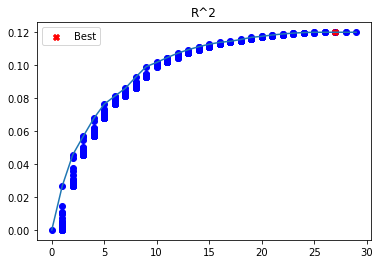

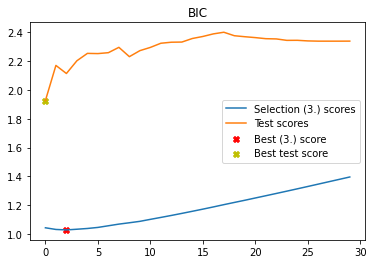

In [78]:
forward_selection(X_train_pd, y_train, X_test_pd, y_test,
                  get_evaluator(make_scorer(r2_score)), np.argmax, # 2.
                  get_evaluator(get_sigma_scorer(bic, sigma)), np.argmin, # 3.
                  get_evaluator(make_scorer(mean_squared_error)), np.argmin, # test
                  candidates_scorer_name="R^2",
                  subsets_scorer_name="BIC",
                  verbose=True)

Every selection does the same results.

### Final thoughts

At the end we cannot find something that is statistically significant, from the data we cannot predict forest fires. I think I do not work enough (and well) on the data before starting the analysis or the data collected does not work well with this type of analysis. Since in the variables there a lot of outliers (and for sure leverage points) one idea is to normalize or try to thin the outliers, because all the output are high skewed. An other idea is to take a look on the interaction terms (effect) since all the weather condition (and FWI parameters) are, in some way, correlated. 